## **Project Name: Predict Electric Vehicle (EV) Trends Using Machine Learning**

The electric vehicle (EV) market is evolving rapidly, driven by technological advancements, policy changes, and consumer preferences. Understanding the trends in EV adoption, charging infrastructure, and vehicle performance is crucial for stakeholders, including policymakers, manufacturers, and consumers.

Several factors influence EV adoption and usage, including battery capacity, charging speed, availability of charging stations, energy consumption, and price trends. In this notebook, I will use various machine learning models to analyze and predict key aspects of EV trends, such as charging demand, station utilization, or battery efficiency.

The primary goal of this project is to develop predictive models that provide insights into EV trends based on various features extracted from real-world data.

By- Ali Akcin

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')  # to remove unnecessary warnings

sns.set_context('talk')  # to generate clear images
sns.set_style('darkgrid')

### **Load EV dataset**

In [ ]:
# Load dataset (modify path if necessary)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_vehicles.csv')

# Display first few rows
display(df.head(10))

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually
5,EVS00006,-23.695008,-46.548187,"1545 São Paulo Ave, São Paulo",AC Level 2,0.22,6:00-22:00,2.02,39,Ionity,350,Tesla,2016,Yes,3.2,9,Quarterly
6,EVS00007,55.762409,37.655830,"1390 Moscow Ave, Moscow",AC Level 1,0.40,24/7,2.68,89,ChargePoint,350,"Tesla, CCS",2011,Yes,4.0,4,Annually
7,EVS00008,13.715561,100.561468,"7684 Bangkok Ave, Bangkok",AC Level 2,0.26,24/7,3.63,72,Ionity,350,Tesla,2013,Yes,4.3,9,Annually
8,EVS00009,41.807653,-87.755349,"6203 Chicago Ave, Chicago",AC Level 2,0.49,9:00-18:00,6.68,68,Greenlots,350,CCS,2013,No,3.4,1,Monthly
9,EVS00010,39.968701,116.433865,"4339 Beijing Ave, Beijing",AC Level 2,0.37,9:00-18:00,19.13,82,Tesla,150,"CCS, Tesla",2023,No,4.4,5,Quarterly


### **Feature Variables:**

**Station ID:** Unique identifier for each EV charging station.

**Latitude & Longitude:** Geographical coordinates of the charging station.

**Address:** Physical location of the station, including street, city, and country.

**Charger Type:** Type of charger available (e.g., AC Level 1, AC Level 2, DC Fast Charger).

**Cost (USD/kWh):** Charging cost per kilowatt-hour in USD.

**Availability:** Operating hours of the charging station.

**Distance to City (km):** Distance of the charging station from the nearest city center.

**Usage Stats (avg users/day):** Average number of users per day at the charging station.

**Station Operator:** The entity managing or owning the charging station (e.g., EVgo, ChargePoint).

**Charging Capacity (kW):** Maximum power output of the charging station.

**Connector Types:** Types of charging connectors available (e.g., CCS, CHAdeMO).

**Installation Year:** The year the charging station was installed.

**Renewable Energy Source:** Indicates whether the charging station is powered by renewable energy (Yes/No).

**Reviews (Rating):** Customer reviews or ratings of the charging station.

**Parking Spots:** Number of parking spaces available at the charging station.

**Maintenance Frequency:** How often the charging station undergoes maintenance (e.g., Annually).

### **Target Variable:**

**Charging Station Usage:** The average number of daily users at the charging station, representing its demand and usage trends.

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Station ID', 'Address'])

# for checking missing value in EV dataframe
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     4964 non-null   float64
 1   Longitude                    4964 non-null   float64
 2   Charger Type                 4964 non-null   object 
 3   Cost (USD/kWh)               4964 non-null   float64
 4   Availability                 4964 non-null   object 
 5   Distance to City (km)        4964 non-null   float64
 6   Usage Stats (avg users/day)  4964 non-null   int64  
 7   Station Operator             4964 non-null   object 
 8   Charging Capacity (kW)       4964 non-null   int64  
 9   Connector Types              4964 non-null   object 
 10  Installation Year            4964 non-null   int64  
 11  Renewable Energy Source      4964 non-null   object 
 12  Reviews (Rating)             4964 non-null   float64
 13  Parking Spots     

**Remarks:**

1. Number of observations (rows): 4,964

2. Number of columns: 17 (16 feature variables and 1 target variable)

3. Number of categorical variables: 8 (e.g., Charger Type, Station Operator, Connector Types, Availability, Renewable Energy Source, Maintenance Frequency)

4. Number of numerical variables: 9 (e.g., Latitude, Longitude, Cost (USD/kWh), Distance to City (km), Usage Stats (avg users/day), Charging Capacity (kW), Installation Year, Reviews (Rating), Parking Spots)

5. Missing values: None detected

### **Data Preprocessing**

**One-hot Encoding**

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Charger Type', 'Availability', 'Station Operator', 'Connector Types', 'Renewable Energy Source', 'Maintenance Frequency']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

**Define Target and Features**

In [ ]:
# Define target and features
target = 'Usage Stats (avg users/day)'
scaler = StandardScaler()  # Changed to StandardScaler
df[target] = scaler.fit_transform(df[[target]])  # Standard scaling instead of MinMax

X = df.drop(columns=[target])
y = df[target]

**Comment:** The target variable is defined as Usage Stats (avg users/day) and the features are set as all other columns. Standard scaling is applied to the target variable to ensure it has zero mean and unit variance.

**Split dataset**

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Comment:** The dataset is split into training (80%) and testing (20%) sets. The training set will be used to train the machine learning model, while the testing set will evaluate the model's performance.

**Train Model with XGBoost and Hyperparameter Tuning**

In [ ]:
# Train model using XGBoost with hyperparameter tuning
model = XGBRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_absolute_error', verbose=1)

**Comment:** The model is trained using the XGBoost regressor with hyperparameter tuning through GridSearchCV. The grid search optimizes parameters such as the number of estimators, learning rate, max depth, and subsample ratios to improve model performance. The best model is selected and evaluated on the test set using Mean Absolute Error (MAE) and R² score. Additionally, cross-validation is applied for a more robust performance estimate.

**Model Evaluation and Cross-Validation**

In [ ]:
# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}, R2 Score: {r2:.2f}')

MAE: 0.86, R2 Score: -0.00


In [ ]:
# Cross-validation for better performance estimate
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE: {-cv_scores.mean():.2f}')



Cross-validated MAE: 0.87


**Comment:**
The feature Connector Types_CCS, CHAdeMO has a coefficient of -8.957 (negative), which means the price will decrease if the Connector Types_CCS, CHAdeMO value increases. On the other hand, the feature Connector Types_Type 2, CCS has a coefficient of 2.124 (positive), meaning that as the Connector Types_Type 2, CCS value increases, the price will increase.

This interpretation follows the same principle: a negative coefficient indicates a decrease in the target variable (price in this case) as the feature's value increases, while a positive coefficient indicates an increase in the target variable as the feature's value increases.

**Model Prediction**

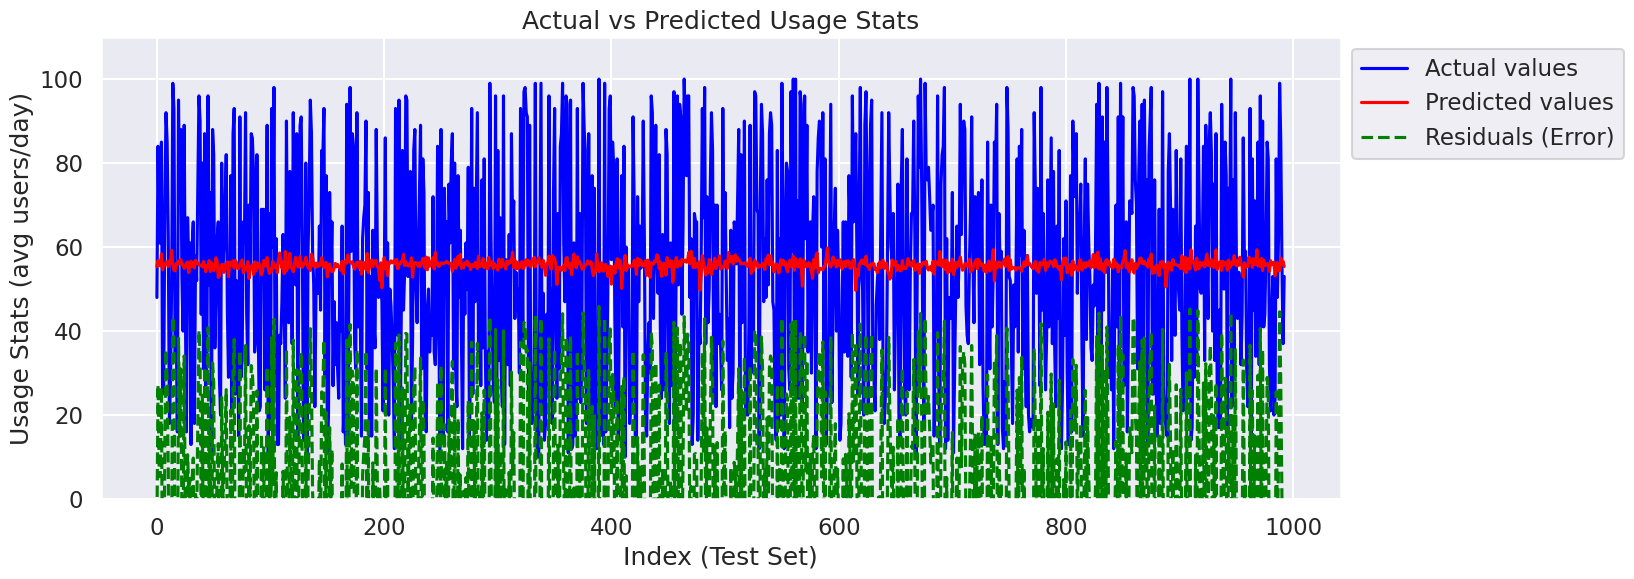

In [ ]:
# Reverse scaling for both actual and predicted values
y_test_rescaled = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Plot actual vs predicted values with adjusted size
plt.figure(figsize=(16, 6))

# Plot actual vs predicted values in the same plot
sns.lineplot(x=np.arange(0, len(y_test), 1), y=y_test_rescaled, label='Actual values', color='blue')
sns.lineplot(x=np.arange(0, len(y_test), 1), y=y_pred_rescaled, label='Predicted values', color='red')

# Plotting the difference (residuals)
sns.lineplot(x=np.arange(0, len(y_test), 1), y=y_test_rescaled - y_pred_rescaled, label='Residuals (Error)', color='green', linestyle='--')

# Title and labels
plt.xlabel('Index (Test Set)')
plt.ylabel('Usage Stats (avg users/day)')
plt.title('Actual vs Predicted Usage Stats')

# Adjust the y-axis for better visualization
plt.ylim([min(y_test_rescaled.min(), y_pred_rescaled.min()) - 10, max(y_test_rescaled.max(), y_pred_rescaled.max()) + 10])

# Move the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


### **Discussion and Future Work**

* **Model Performance:** The MAE of 0.86 indicates a relatively low absolute prediction error, and the cross-validated MAE of 0.87 confirms the consistency of the error across different folds. While the current R² score is -0.00, suggesting limited variance capture, this may be attributed to dataset characteristics or modeling choices.

* **Potential Factors Affecting Performance:**

  * Further refinement of feature engineering could enhance the model’s ability to capture complex relationships.  
  * Exploring additional transformations for categorical variables and optimizing feature scaling may improve predictive power.  
  * Evaluating alternative algorithms suited for structured data could yield better results.  

* **Future Improvements:**

  * Strengthen feature selection and engineering to extract deeper insights.  
  * Investigate non-linear models or ensemble techniques to enhance prediction accuracy.  
  * Consider time-series forecasting approaches if usage patterns exhibit temporal dependencies.  
  * Experimenting with additional machine learning algorithms like Random Forest or Gradient Boosting.
  * Fine-tuning hyperparameters using advanced techniques such as RandomizedSearchCV.
  * Incorporating more features or external datasets to enrich the model's predictive power.

These improvements could help refine the model for even better results. If you found this notebook useful, please consider upvoting it.